##### Imports

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

############################################ FEATURE SELECTION ############################################
#!pip install scipy
import scipy.stats as stats
from scipy.stats import chi2_contingency # filter method
from sklearn.feature_selection import RFE # wrapper method
from sklearn.linear_model import LogisticRegression #(This is one possible model to apply inside RFE)
from sklearn.linear_model import LassoCV # embedded method
from sklearn.tree import DecisionTreeClassifier # embedded method

import warnings
warnings.filterwarnings('ignore')


df_training = pd.read_excel(r'historical.xlsx')
df_testing = pd.read_excel(r'predict.xlsx')


In [ ]:
# import pandas as pd


# df_training = pd.read_csv('../Data/historical.csv')
# df_testing = pd.read_csv('../Data/predict.csv')

In [48]:
df_training.set_index('CustomerID', inplace = True)
df_training

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Date_Adherence,Recency,MntMeat&Fish,...,NumAppVisitsMonth,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Response_Cmp1,Complain,CostContact,Revenue,DepVar
CustomerID,,,,,,,,,,,,,,,,,,,,,
30651,Mr. Trevor Ferguson,1987,Graduation,Married,46575,0,0,2022-02-20 00:00:00,71.0,30,...,7,0,0,0,0,0,0,3,16,0
6222,Mr. Peter Gray,1973,PhD,Together,48852,1,0,2022-01-13 00:00:00,34.0,130,...,8,0,0,0,0,0,0,3,16,0
3909,Mrs. Theresa Wallace,1961,Graduation,Married,91345,0,1,2021-04-21 00:00:00,75.0,4160,...,6,0,0,0,0,0,0,3,16,0
20121,Miss Lillian Alsop,1977,Graduation,Together,102522,0,1,2021-05-30 00:00:00,95.0,3120,...,5,0,0,0,0,0,0,3,16,0
19896,Miss Lillian Dowd,1961,Master,Together,38770,0,0,2020-11-19 00:00:00,46.0,30,...,9,0,0,0,0,0,0,3,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13344,Mr. Justin Metcalfe,1967,Graduation,Widow,89377,0,0,2021-09-26 00:00:00,11.0,2530,...,3,0,0,0,0,0,0,3,16,0
28152,Mr. Brandon Nash,1968,Master,Married,95486,0,1,2021-11-15 00:00:00,4.0,7380,...,7,0,0,0,0,0,0,3,16,1
31938,Mr. Simon Mills,1970,Graduation,Single,28620,1,1,2022-01-27 00:00:00,47.0,140,...,8,1,0,0,0,0,0,3,16,1


In [49]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 30651 to 15492
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   2518 non-null   object 
 1   Birthyear              2518 non-null   int64  
 2   Education              2485 non-null   object 
 3   Marital_Status         2518 non-null   object 
 4   Income                 2518 non-null   int64  
 5   Kid_Younger6           2518 non-null   int64  
 6   Children_6to18         2518 non-null   int64  
 7   Date_Adherence         2518 non-null   object 
 8   Recency                2470 non-null   float64
 9   MntMeat&Fish           2518 non-null   int64  
 10  MntEntries             2518 non-null   int64  
 11  MntVegan&Vegetarian    2518 non-null   int64  
 12  MntDrinks              2497 non-null   float64
 13  MntDesserts            2518 non-null   int64  
 14  MntAdditionalRequests  2518 non-null   int64  
 15 

In [50]:
df_training['Education'].value_counts()

Graduation    1259
PhD            525
Master         408
HighSchool     227
Basic           66
Name: Education, dtype: int64

In [51]:
df_training['Recency'].value_counts()

45.0    37
39.0    35
66.0    34
1.0     33
26.0    33
        ..
85.0    18
58.0    17
44.0    17
59.0    15
15.0    12
Name: Recency, Length: 100, dtype: int64

In [52]:
df_training['Marital_Status'].value_counts()

Married     1017
Together     596
Single       538
Divorced     213
Widow         82
married       37
single        15
together       9
divorced       6
widow          5
Name: Marital_Status, dtype: int64

In [53]:
df_training['Marital_Status'] = df_training['Marital_Status'].replace('Together','Married')
df_training['Marital_Status'] = df_training['Marital_Status'].replace('together','Married')
df_training['Marital_Status'] = df_training['Marital_Status'].replace('married','Married')
df_training['Marital_Status'] = df_training['Marital_Status'].replace('divorced','Divorced')
df_training['Marital_Status'] = df_training['Marital_Status'].replace('widow','Widow')
df_training['Marital_Status'] = df_training['Marital_Status'].replace('single','Single')

In [54]:
df_training['Marital_Status'].value_counts()

Married     1659
Single       553
Divorced     219
Widow         87
Name: Marital_Status, dtype: int64

In [55]:
df_training.isnull().sum()

Name                      0
Birthyear                 0
Education                33
Marital_Status            0
Income                    0
Kid_Younger6              0
Children_6to18            0
Date_Adherence            0
Recency                  48
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                21
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Response_Cmp2             0
Response_Cmp3             0
Response_Cmp4             0
Response_Cmp5             0
Response_Cmp1             0
Complain                  0
CostContact               0
Revenue                   0
DepVar                    0
dtype: int64

In [56]:
df_training[df_training.Education.isna()]
df_training.Education.fillna(df_training.Education.mode()[0], inplace = True)

In [57]:
df_training[df_training.Recency.isna()]
df_training.Recency.fillna(df_training.Recency.mode()[0], inplace = True)

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

df_knn = df_training[['MntDrinks', 'MntEntries', 'MntVegan&Vegetarian', 'MntDesserts']].copy()  # Used these 3 vars bcs higher corr with target var (0.7)

# Define the parameter grid to search over
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Define the imputer model
imputer = KNNImputer()

# Define the grid search object with 5-fold cross-validation
grid_search = GridSearchCV(imputer, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object to the data
grid_search.fit(df_knn)
grid_search
print("Best parameters: ", grid_search.best_params_)
print("Best negative mean squared error: ", grid_search.best_score_)

#NEEDS TO BE STUDIED

Best parameters:  {'n_neighbors': 1}
Best negative mean squared error:  nan


In [59]:
imputer = KNNImputer(n_neighbors=1)
array_impute = imputer.fit_transform(df_knn) 
df_knn = pd.DataFrame(array_impute, columns=df_knn.columns, index=df_knn.index)
df_training['MntDrinks'] = df_knn.MntDrinks

In [60]:
df_training['Gender'] = np.where(df_training['Name'].str.contains('Mr.'), 'M', 'F')

In [61]:
df_training.isnull().sum()

Name                     0
Birthyear                0
Education                0
Marital_Status           0
Income                   0
Kid_Younger6             0
Children_6to18           0
Date_Adherence           0
Recency                  0
MntMeat&Fish             0
MntEntries               0
MntVegan&Vegetarian      0
MntDrinks                0
MntDesserts              0
MntAdditionalRequests    0
NumOfferPurchases        0
NumAppPurchases          0
NumTakeAwayPurchases     0
NumStorePurchases        0
NumAppVisitsMonth        0
Response_Cmp2            0
Response_Cmp3            0
Response_Cmp4            0
Response_Cmp5            0
Response_Cmp1            0
Complain                 0
CostContact              0
Revenue                  0
DepVar                   0
Gender                   0
dtype: int64

In [68]:
df_training[df_training.duplicated()].shape[0]  # 18 duplicates
df_training.drop_duplicates(inplace=True)

In [69]:
skf = StratifiedKFold(n_splits = 5, random_state = 99, shuffle = True)

In [70]:
X = df_training.drop('DepVar', axis = 1)
y = df_training['DepVar'].copy()

In [71]:
def apply_chisquare(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [89]:
def select_best_features(X,y):
    count = 1
    
    ############################################## APPLY SKF ######################################################
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        
        #################################### SELECT FEATURES WITH CHI-SQUARE #######################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using chi-square
        X_train_ = X_train[['Recency', 'Children_6to18', 'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts', 'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth', 'Response_Cmp1','Response_Cmp2', 'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5', 'Gender', 'Education', 'Marital_Status', 'Income', 'Birthyear', 'Kid_Younger6', 'Date_Adherence', 'Complain', 'CostContact', 'Revenue']].copy()
        for var in X_train_:
            apply_chisquare(X_train_[var],y_train, var)
            
        count+=1

In [90]:
select_best_features(X,y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
Recency is IMPORTANT for Prediction
Children_6to18 is IMPORTANT for Prediction
MntMeat&Fish is IMPORTANT for Prediction
MntEntries is IMPORTANT for Prediction
MntVegan&Vegetarian is IMPORTANT for Prediction
MntDrinks is IMPORTANT for Prediction
MntDesserts is IMPORTANT for Prediction
MntAdditionalRequests is IMPORTANT for Prediction
NumOfferPurchases is IMPORTANT for Prediction
NumAppPurchases is IMPORTANT for Prediction
NumTakeAwayPurchases is IMPORTANT for Prediction
NumStorePurchases is IMPORTANT for Prediction
NumAppVisitsMonth is IMPORTANT for Prediction
Response_Cmp1 is IMPORTANT for Prediction
Response_Cmp2 is IMPORTANT for Prediction
Response_Cmp3 is IMPORTANT for Prediction
Response_Cmp4 is IMPORTANT for

Income is NOT an important predictor. (Discard Income from model)
Birthyear is NOT an important predictor. (Discard Birthyear from model)
Kid_Younger6 is NOT an important predictor. (Discard Kid_Younger6 from model)
Date_Adherence is NOT an important predictor. (Discard Date_Adherence from model)
Complain is NOT an important predictor. (Discard Complain from model)
CostContact is NOT an important predictor. (Discard CostContact from model)
Revenue is NOT an important predictor. (Discard Revenue from model)


In [ ]:
#To keep: Recency, Children_6to18, MntMeat&Fish, MntEntries, MntVegan&Vegetarian, MntDrinks, MntDesserts, MntAdditionalRequests, NumOfferPurchases, NumAppPurchases, NumTakeAwayPurchases, NumStorePurchases, NumAppVisitsMonth, Response_Cmp1,Response_Cmp2, Response_Cmp3, Response_Cmp4, Response_Cmp5,    
#To remove: Gender, Education, Marital_Status, Income, Birthyear, Kid_Younger6, Date_Adherence, Complain, CostContact, Revenue

In [91]:
X = X.drop(['Gender', 'Education', 'Marital_Status', 'Income', 'Birthyear', 'Kid_Younger6', 'Date_Adherence', 'Complain', 'CostContact', 'Revenue'], axis = 1)

In [92]:
def apply_variance(X_train):
    print(X_train.var())

In [127]:
def select_features_variance(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        ######################################### SELECT FEATURES #################################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using variance
        apply_variance(X_train)
            
        count+=1

In [128]:
select_features_variance(X,y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
Children_6to18           2.931343e-01
Recency                  7.978466e+02
MntMeat&Fish             1.133034e+07
MntEntries               5.661167e+05
MntVegan&Vegetarian      1.531684e+07
MntDrinks                6.205014e+05
MntDesserts              5.681426e+05
MntAdditionalRequests    2.402257e+03
NumOfferPurchases        5.439750e+00
NumAppPurchases          7.553717e+00
NumTakeAwayPurchases     1.179090e+01
NumStorePurchases        1.099567e+01
NumAppVisitsMonth        7.420221e+00
Response_Cmp2            7.405678e-02
Response_Cmp3            6.340770e-02
Response_Cmp4            7.321636e-02
Response_Cmp5            5.993397e-02
Response_Cmp1            1.283742e-02
dtype: float64
_______________________

In [129]:
#Note: We don't have constant features

In [130]:
def cor_heatmap(cor):
    plt.figure(figsize=(9,6))
    sns.heatmap(data = cor[cor >0.7], annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [131]:
def apply_correlation(X_train):
    correlation_data = X_train.drop(['Children_6to18', 'Response_Cmp1', 'Response_Cmp2', 'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5'], axis = 1).copy()
    matrix = correlation_data.corr(method = 'spearman')
    cor_heatmap(matrix)

In [132]:
def redundant_features(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        
        ######################################### SELECT FEATURES #################################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')
        
        # check which features to use using spearman correlation
        apply_correlation(X_train)
        
        count+=1

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________


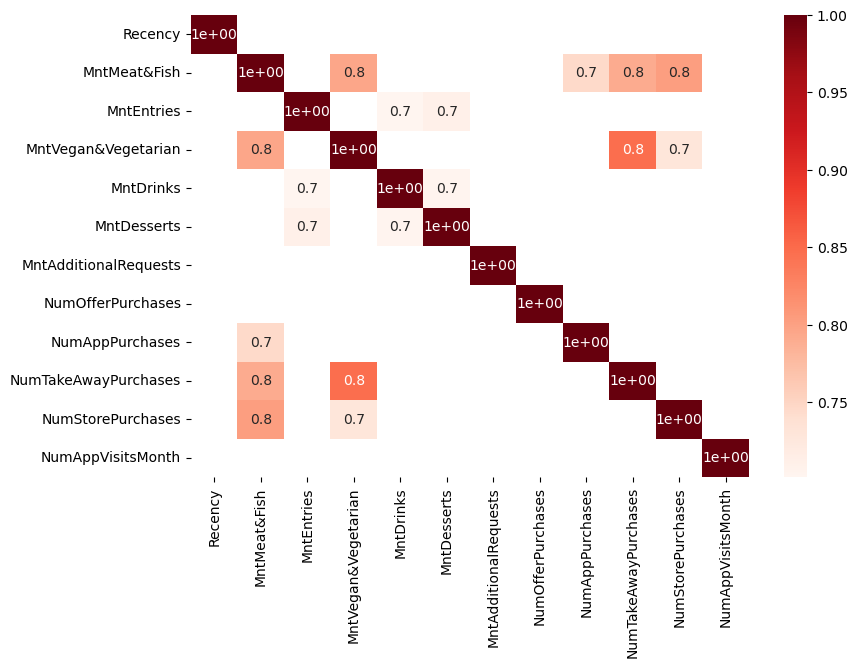

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________


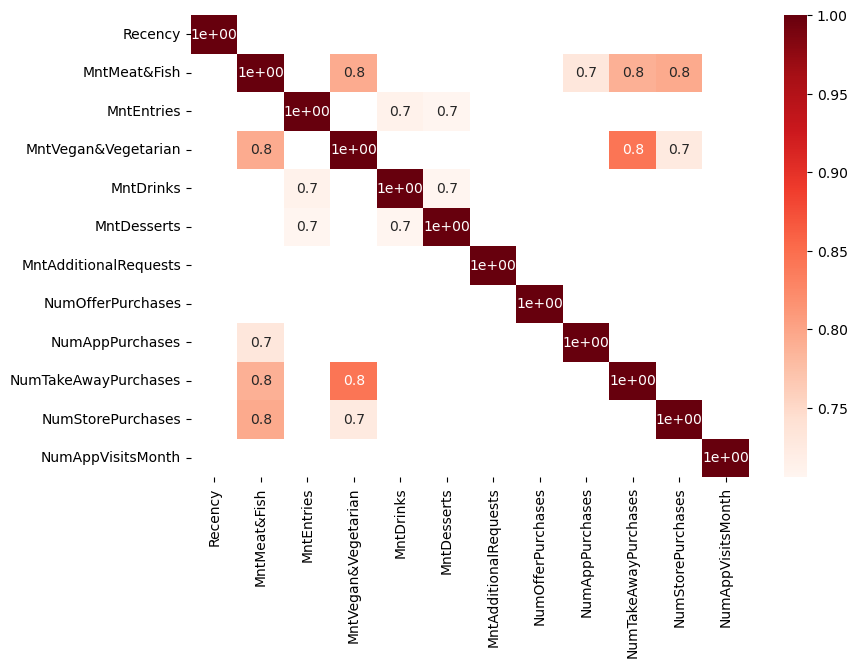

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________


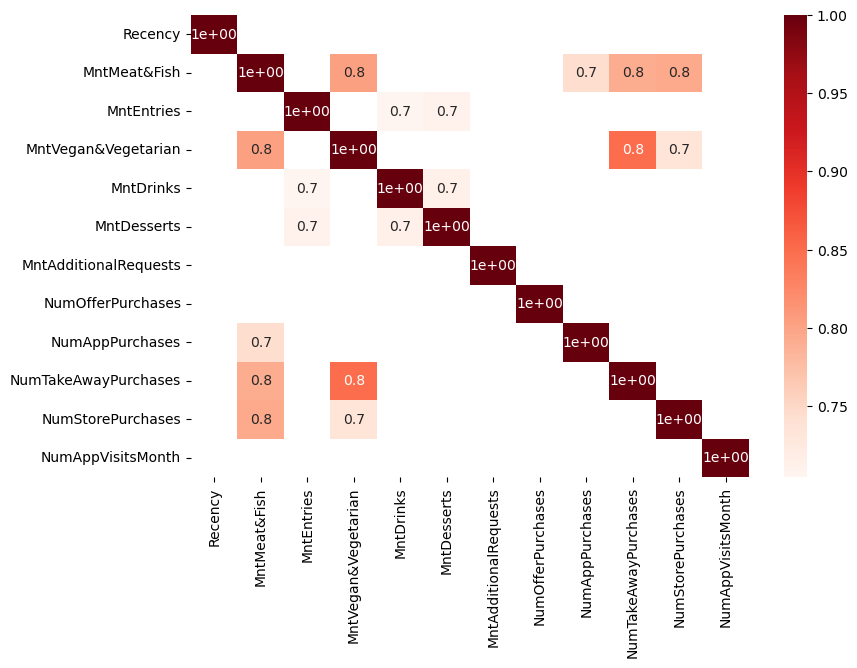

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________


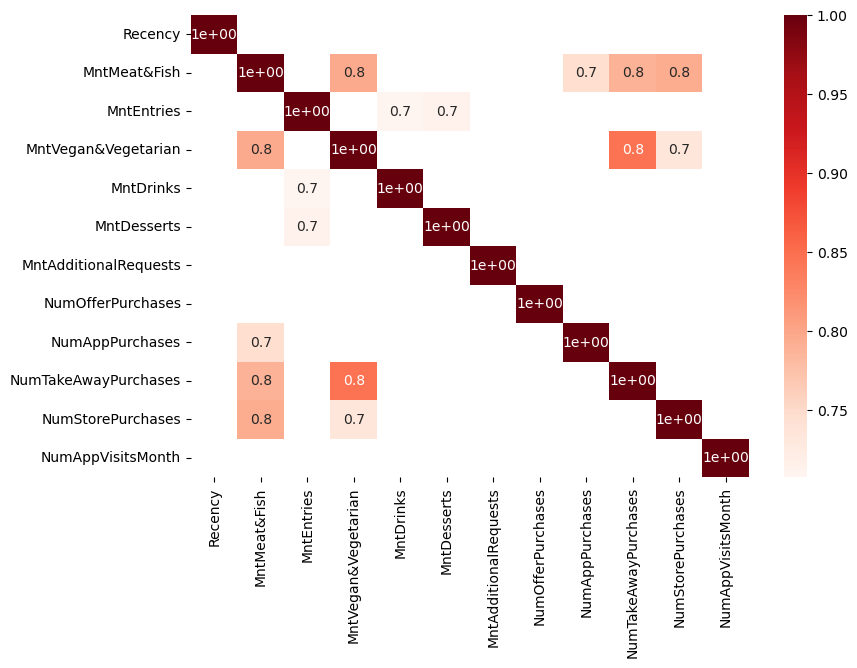

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________


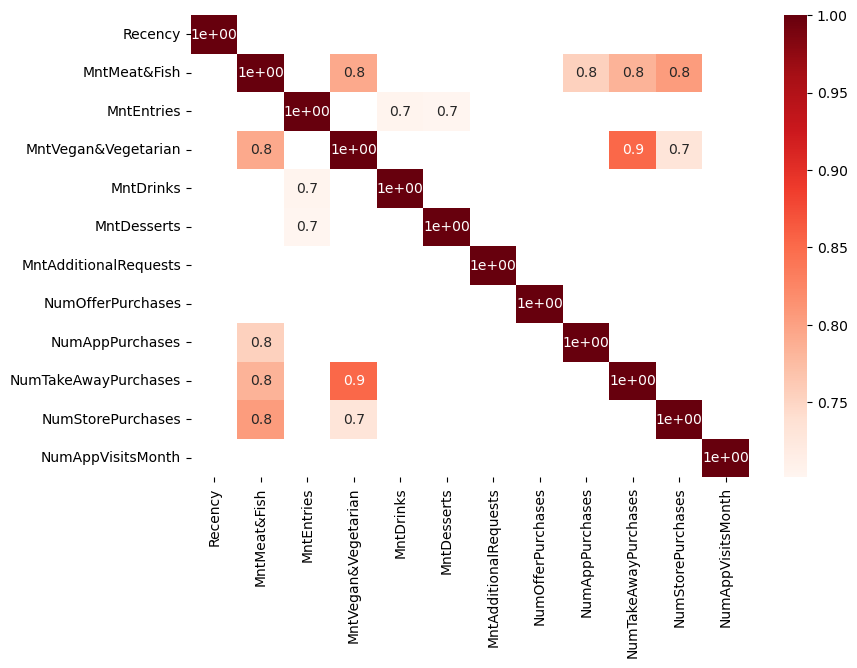

In [133]:
redundant_features(X, y)